In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import os


import colorsys
from General.segments import SEGMENT_INDEX
from matplotlib.colors import ListedColormap

def build_label_colormap(n_labels, background=(0, 0, 0)):
    """
    n_labels: max label index (inclusive)
    background: RGB in range [0,1]
    """
    colors = np.zeros((n_labels + 1, 3))
    colors[0] = background  # background = black

    golden_ratio = 0.61803398875
    h = 0.0

    for i in range(1, n_labels + 1):
        h = (h + golden_ratio) % 1
        s = 0.65
        v = 0.95
        colors[i] = colorsys.hsv_to_rgb(h, s, v)

    return ListedColormap(colors)


cmap = build_label_colormap(max(SEGMENT_INDEX.values()))


def return_file_path(base_dir, patient, image):


    patient = 'sample_' + patient
    return os.path.join(base_dir, patient, image)


base_dir = r'C:\Projects\differentHPs'
hp_name = r'baseline_l5000_k10'
# hp_name = 'ctsmoothness_l5000_k10_mar3000'
# Paths to your images
patient = '0034'

warped_moving_path = return_file_path(os.path.join(base_dir , hp_name), patient, 'fdg_pt_warped.nii.gz')
warped_moving_mask_path = return_file_path(os.path.join(base_dir , hp_name), patient, 'fdg_mask_warped.nii.gz')
fixed_path = return_file_path(os.path.join(base_dir , hp_name), patient, 'psma_pt.nii.gz')
fixed_mask_path = return_file_path(os.path.join(base_dir , hp_name), patient, 'psma_ct_mask.nii.gz')

warped_moving_ct_path = return_file_path(os.path.join(base_dir , hp_name), patient, 'fdg_ct_warped.nii.gz')
fixed_ct_path = return_file_path(os.path.join(base_dir , hp_name), patient, 'psma_ct.nii.gz')


# Read ITK images
warped_moving_img = sitk.ReadImage(warped_moving_path)
warped_moving_mask_img = sitk.ReadImage(warped_moving_mask_path)
fixed_img = sitk.ReadImage(fixed_path)
fixed_mask_img = sitk.ReadImage(fixed_mask_path)

warped_moving_ct_img = sitk.ReadImage(warped_moving_ct_path)  # <-- new
fixed_ct_img = sitk.ReadImage(fixed_ct_path)                  # <-- new

# Convert to NumPy arrays (z, y, x)
warped_moving = sitk.GetArrayFromImage(warped_moving_img)
warped_moving_mask = sitk.GetArrayFromImage(warped_moving_mask_img)
fixed = sitk.GetArrayFromImage(fixed_img)
fixed_mask = sitk.GetArrayFromImage(fixed_mask_img)

warped_moving_ct = sitk.GetArrayFromImage(warped_moving_ct_img)  # <-- new
fixed_ct = sitk.GetArrayFromImage(fixed_ct_img)                  # <-- new

print("Image shape (z, y, x):", fixed.shape)





warped_moving_ct.max(), fixed_ct.max()

Image shape (z, y, x): (384, 128, 128)


(np.float32(1.0000002), np.float32(1.0))

In [2]:
# from Registration.inferencing import mutual_information, dice_metric, dice_for_organs
# import torch

# # --- Convert images to PyTorch tensors ---
# # PET images
# fixed_pet = torch.tensor(fixed, dtype=torch.float32)
# moving_pet = torch.tensor(warped_moving, dtype=torch.float32)

# # CT images
# fixed_ct = torch.tensor(fixed_ct, dtype=torch.float32)
# moving_ct = torch.tensor(warped_moving_ct, dtype=torch.float32)

# # CT masks (for Dice)
# fixed_ct_mask = torch.tensor(fixed_mask, dtype=torch.float32)
# moving_ct_mask = torch.tensor(warped_moving_mask, dtype=torch.float32)



# mi_pet = mutual_information(fixed_pet, moving_pet)
# print("Mutual Information (PET):", mi_pet)

# dice_ct = dice_metric(moving_ct_mask, fixed_ct_mask)
# print("Dice Score (CT):", dice_ct)


# organs = ["liver", "spleen", "kidney_right"]
# dice_list = dice_for_organs(moving_ct_mask, fixed_ct_mask, organs)

# for organ, dice in zip(organs, dice_list):
#     print(f"Dice score for {organ}: {dice:.4f}")

In [3]:
# Choose slice index (along z)
slice_idx = fixed.shape[1] // 2  # middle slice
slice_idx = 50

wm_slice = warped_moving[:, slice_idx, :]
wm_mask_slice = warped_moving_mask[:, slice_idx, :]
fixed_slice = fixed[:, slice_idx, :]
fixed_mask_slice = fixed_mask[:, slice_idx, :]

wm_ct_slice = warped_moving_ct[:, slice_idx, :]
fixed_ct_slice = fixed_ct[:, slice_idx, :]


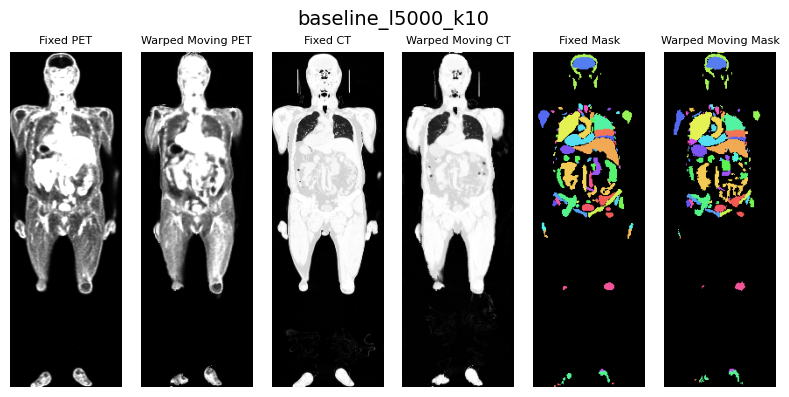

In [4]:
fig, axes = plt.subplots(1, 6, figsize=(8, 4))  # 1 row, 6 columns
fig.suptitle(hp_name, fontsize=14)  # slightly smaller overall title

# Column 1: Fixed PET
axes[0].imshow(np.rot90(fixed_slice, k=2), cmap="gray")
axes[0].set_title("Fixed PET", fontsize=8)
axes[0].axis("off")

# Column 2: Warped Moving PET
axes[1].imshow(np.rot90(wm_slice, k=2), cmap="gray")
axes[1].set_title("Warped Moving PET", fontsize=8)
axes[1].axis("off")

# Column 3: Fixed CT
axes[2].imshow(np.rot90(fixed_ct_slice, k=2), cmap="gray")
axes[2].set_title("Fixed CT", fontsize=8)
axes[2].axis("off")

# Column 4: Warped Moving CT
axes[3].imshow(np.rot90(wm_ct_slice, k=2), cmap="gray")
axes[3].set_title("Warped Moving CT", fontsize=8)
axes[3].axis("off")

# Column 5: Fixed PET Mask (overlay)
axes[4].imshow(np.rot90(fixed_slice, k=2), cmap="gray")
axes[4].imshow(np.rot90(fixed_mask_slice, k=2), cmap=cmap)
axes[4].set_title("Fixed Mask", fontsize=8)
axes[4].axis("off")

# Column 6: Warped Moving CT Mask (overlay)
axes[5].imshow(np.rot90(wm_ct_slice, k=2), cmap="gray")
axes[5].imshow(np.rot90(wm_mask_slice, k=2), cmap=cmap)
axes[5].set_title("Warped Moving Mask", fontsize=8)
axes[5].axis("off")

plt.tight_layout()
plt.show()